# Practical 2

# Task 1: The Data

We use the mouse protein expression dataset: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
Please use the code provided below for loading the dataset.
Let's start with a bit of exploration.

### Tasks 1.1: Dataset Exploration 
- How many samples / features are provided?
- How many labels does the dataset have?
- What is the value range of the individuals predictors?
- Visualize the 10 first samples of the dataset in a form that highlights their differences.
- Visualize the variance of each predictor.


In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file = 'data/Data_Cortex_Nuclear.csv'
df = pd.read_csv(file)

N = 10  # use only every tenth sample
X_all = df.iloc[::N,1:65].to_numpy()
t_all = (df['Behavior'] == 'S/C').to_numpy()[::N]

idx = ~np.any(np.isnan(X_all), axis=1)
X_all = X_all[idx]
t_all = t_all[idx]

#### How many samples / features are provided?

In [113]:
print(f"{X_all.shape[0]} samples and {X_all.shape[1]} features are provided.")

105 samples and 64 features are provided.


#### How many labels does the dataset have?

In [114]:
t_all_describe = pd.DataFrame(t_all)
print(t_all_describe.describe())
print("Labels = 2")

           0
count    105
unique     2
top     True
freq      53
Labels = 2


#### What is the value range of the individuals predictors?

In [115]:
X_min = np.apply_along_axis(np.min, 0, X_all)
X_max = np.apply_along_axis(np.max, 0, X_all)

value_range = X_max - X_min
value_range

array([2.31182236, 2.19641444, 0.24879962, 1.60988473, 4.47403884,
       0.16266593, 0.12308063, 5.9089954 , 0.15995567, 3.70637954,
       3.10974369, 0.21118125, 0.24057646, 0.19194263, 0.54586796,
       0.94853509, 1.9439142 , 2.00016996, 0.28622205, 0.69362862,
       1.98055881, 0.3010532 , 0.15016614, 1.97547232, 3.1439359 ,
       1.80963645, 0.13195188, 0.21738739, 0.72370278, 0.1303156 ,
       0.32906611, 1.90053074, 1.60954355, 0.3742393 , 0.37794523,
       0.77876004, 0.62118476, 0.30899124, 0.53667323, 0.28894357,
       0.22572903, 0.34877591, 0.86978962, 0.17206998, 1.03562519,
       0.13159087, 2.50692979, 0.18242153, 0.6186108 , 1.7500144 ,
       1.28170655, 0.22195905, 0.10283832, 0.06718181, 0.0813432 ,
       0.14662723, 0.44193635, 0.06803348, 0.17504531, 0.10508762,
       0.425993  , 0.13651474, 1.48360013, 1.2800906 ])

In [116]:
X_all_describe = pd.DataFrame(X_all)
X_all_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.459386,0.662233,0.327279,2.398685,4.112289,0.230759,0.181717,3.726384,0.219577,1.461349,...,0.156639,0.185941,0.214206,0.119674,0.225741,0.128912,0.521567,0.290061,1.582238,2.263036
std,0.296894,0.277596,0.050868,0.350001,0.965609,0.034731,0.024823,1.317745,0.031315,0.473070,...,0.015720,0.025875,0.069359,0.013108,0.034079,0.020737,0.079133,0.030927,0.266927,0.246485
min,0.168493,0.292269,0.198159,1.564858,1.991141,0.165286,0.124793,1.555075,0.134882,0.790958,...,0.117840,0.114111,0.125190,0.087666,0.129296,0.082373,0.296247,0.220444,0.971291,1.512936
25%,0.299141,0.492653,0.295212,2.194366,3.521615,0.203963,0.164304,2.652073,0.201789,1.236318,...,0.148523,0.170160,0.172645,0.111675,0.203540,0.112456,0.479284,0.269662,1.408000,2.102881
50%,0.381261,0.602178,0.322087,2.432402,4.030709,0.230412,0.181124,3.522325,0.219718,1.403629,...,0.156331,0.186951,0.194368,0.118964,0.224466,0.130251,0.518580,0.287439,1.576154,2.278392
75%,0.508590,0.729310,0.362708,2.611246,4.649765,0.250174,0.196301,4.654004,0.240540,1.608534,...,0.164223,0.204526,0.238560,0.127365,0.250460,0.144702,0.567962,0.308899,1.752423,2.428759
max,2.480316,2.488684,0.446958,3.174743,6.465180,0.327952,0.247874,7.464070,0.294838,4.497337,...,0.199183,0.260739,0.567127,0.155700,0.304341,0.187461,0.722240,0.356958,2.454891,2.793027


####  Visualize the 10 first samples of the dataset in a form that highlights their differences.

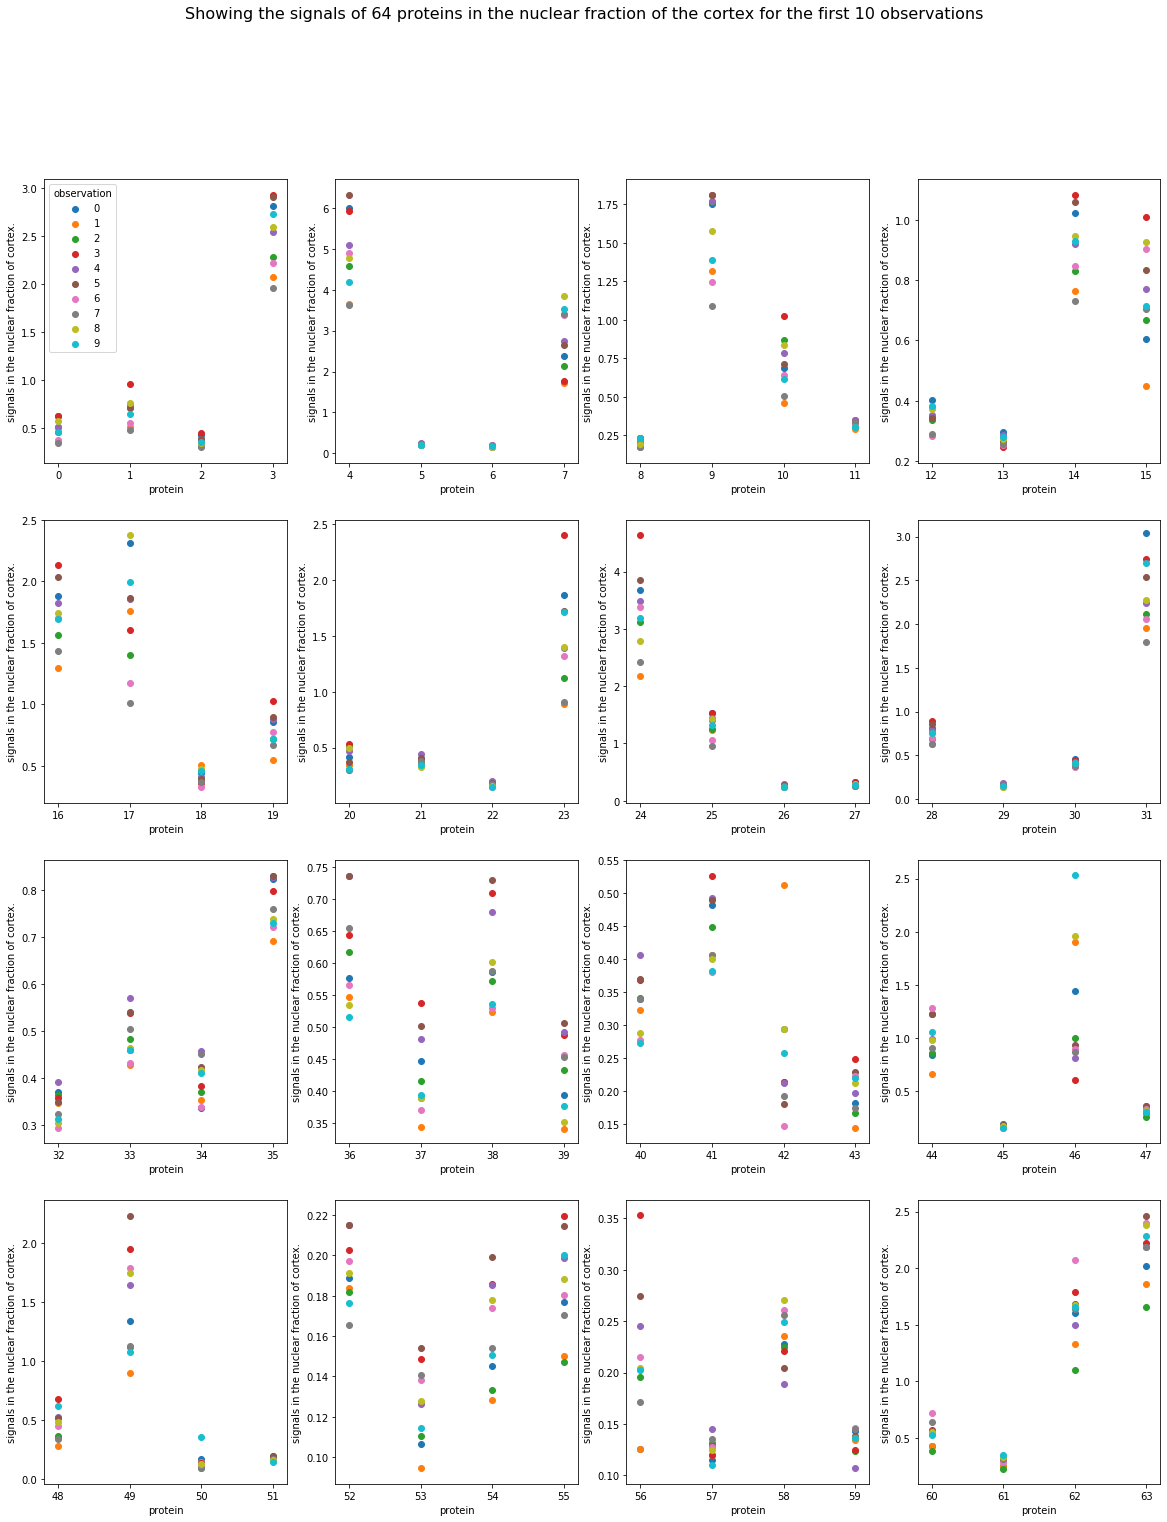

In [117]:
fig, axes = plt.subplots(4,4, figsize = (20,24))

b=0

for i in range(4):
    for j in range(4):
        proteins = list(range(b*4,b*4+4))
        
        for o in range(10):
            axes[i][j].scatter(proteins, X_all[o][proteins])
            axes[i][j].set_xticks(proteins)
            axes[i][j].set_xlabel('protein')
            axes[i][j].set_ylabel('signals in the nuclear fraction of cortex.')            
        
        b=b+1
        
axes[0][0].legend(list(["0","1","2","3","4","5","6","7","8","9"]), title="observation")   
fig.suptitle('Showing the signals of 64 proteins in the nuclear fraction of the cortex for the first 10 observations', fontsize=16)

plt.show()   

#### Visualize the variance of each predictor.

In [118]:
variances = pd.DataFrame(X_all).apply(np.var,axis=0)

Text(0.5, 1.0, 'Variance of each protein')

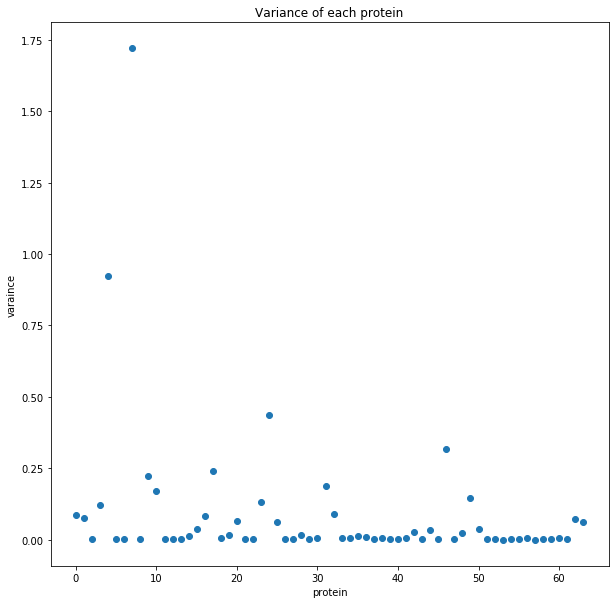

In [119]:
fig, plt.figure(figsize = (10,10))

plt.scatter(list(range(64)), variances)

plt.xlabel("protein")
plt.ylabel("varaince")
plt.title("Variance of each protein")


**Task 1.2: Data Preprocessing**:  
- Write a function `split_data(X, y, frac, seed)` that first shuffles your training data and then splits it into a training and a test set. `frac` determines the relative size of the test dataset, `seed` makes sure we get reproducible 
results.  
- Write a function `preprocess(X)` which zero-centers your data and sets variance to one (per-feature).

In [120]:
#Split function von Domenik:

def split_data(X, y, frac=0.3, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    n = len(y)
    idx = np.arange(n)
    shuffled = np.random.permutation(idx)
    X = X[shuffled]
    y = y[shuffled]
    
    n_test = int(n*frac)
    
    X_test = X[:n_test]
    y_test = y[:n_test]
    
    X_train = X[n_test+1:] #hier ist das +1 nicht nötig so fehlt eine observation
    y_train = y[n_test+1:] #hier ist das +1 nicht nötig so fehlt eine observation
    
    return X_train, X_test, y_train, y_test





In [121]:
#Wenn man sich die 3 shape ansieht sieht man das X und X_test zusammen eine zeile weniger haben als X_all
X_all.shape

(105, 64)

In [122]:
X.shape

(73, 64)

In [123]:
X_test.shape

(32, 64)

In [124]:
#Erläuterung am Beispiel:
list(range(10))[:5]

[0, 1, 2, 3, 4]

In [125]:
list(range(10))[5:]

[5, 6, 7, 8, 9]

In [139]:
def split_data(X, y, frac=0.3, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    idx = list(range(len(X)))
    idx_shuffled = np.random.permutation(idx)
    
    X_shuffled = X[idx_shuffled]
    y_shuffled = y[idx_shuffled]
    
    train_len = int((1-frac)*len(X))
    
    X_shuffled_train = X_shuffled[:train_len]
    y_shuffled_train = y_shuffled[:train_len]
    
    X_shuffled_test = X_shuffled[train_len:]
    y_shuffled_test = y_shuffled[train_len:]
        
        
    return X_shuffled_train, X_shuffled_test, y_shuffled_train, y_shuffled_test

In [140]:
def preprocess(X):
    m = X.mean(axis=0)
    s = X.std(axis=0)
    X_cen = (X - m)/s
    return X_cen, m, s

# Task 2: LDA

First, use Linear Discriminant Analysis to separate the classes. As discussed in the Bishop in pg. 186-189, we can find a weight vector $\vec{w}$ that performs a projection of the i-th input data point $\vec{x}_i$

$p =   \vec{w}^T \vec{x}_i$

that optimally separates the classes.

Use the analytic solution to compute the optimal weights $\vec{w}$ from the training set data. 

** Task 2.1 ***

1. Implement a function `compute_lda_weights(x, y)` manually, which carries out LDA using the data `x,y`. 
2. Apply this function on your training data.
3. Visualize the obtained weight vector $\vec{w}$ using a `plt.stemplot`.

In [135]:
def compute_lda_weights(x, y):
    x_group_1 = x[y]
    x_group_2 = x[~y]
    
    m1 = x_group_1.mean(axis=0)
    m2 = x_group_2.mean(axis=0)
    
    x_group_1_cen = x_group_1 - m1
    x_group_2_cen = x_group_2 - m2
    
    var1 = x_group_1_cen.T @ x_group_1_cen
    var2 = x_group_2_cen.T @ x_group_2_cen
    
    sw = var1 + var2
    
    w_ml = np.linalg.inv(sw) @ (m2 - m1)
    
    w_ml = w_ml / np.linalg.norm(w_ml)
    
    return m1, m2, sw, w_ml
    

Text(0.5, 0, 'predictors')

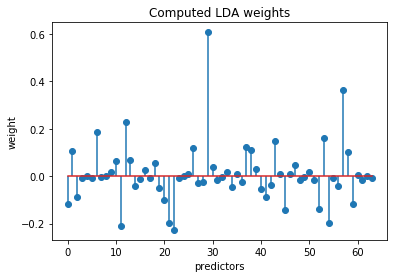

In [136]:
X, X_test, t, t_test = split_data(X_all, t_all, seed=1)
m0, m1, mdiff, w_lda = compute_lda_weights(X, t)

plt.stem(w_lda.flatten(), use_line_collection=True)
plt.title('Computed LDA weights')
plt.ylabel('weight')
plt.xlabel('predictors')

### Task 2.3

Project the training data and the test data on $\vec{w}$. Visualize the class separation using a two-color histogram. 
- Is the class separation good?
- Is there a big difference between training and test data?

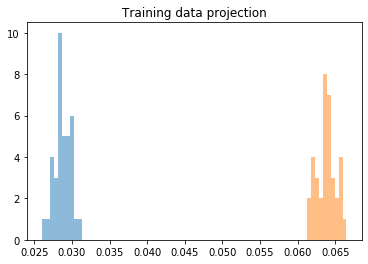

In [137]:
y_training = w_lda.T @ X.T

g1_train = y_training[t]
g2_train = y_training[~t]

plt.title('Training data projection')
_ = plt.hist(g1_train,label='class 0',alpha=0.5)
_ = plt.hist(g2_train,label='class 1',alpha=0.5)

#### Is the class separation good?

Yes. There is no overlap between the classes, they are far away from each other and the variance within classes is quite small.

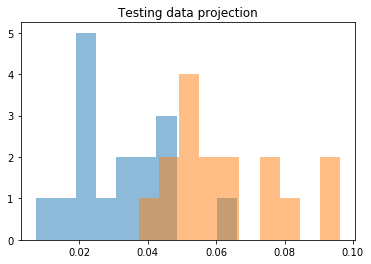

In [138]:
y_test = w_lda.T @ X_test.T

g1_test = y_test[t_test]
g2_test = y_test[~t_test]

plt.title('Testing data projection')
_ = plt.hist(g1_test,label='class 0',alpha=0.5)
_ = plt.hist(g2_test,label='class 1',alpha=0.5)

#### Is there a big difference between training and test data?

Yes. In the test data the classification is not as clear as in the training data. The groups are close to each other and there is overlapp. further the group varaince is much larger.

### Task 2.4 

Now we make class predictions based on the projections. Read https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Fisher's_linear_discriminant and compute threshold $c$ for the projected values $p$ based on the training data. Print the value of $c$ and plot $c$ into the histograms of projected values you made before!

Use $c$ to assign class labels for training and test set. Determine the classification errors (in terms of accuracy) on both datasets and print them. 

In [143]:
c = 0.5 * w_lda @ (m0 + m1)
print(c)

0.04627984708655741


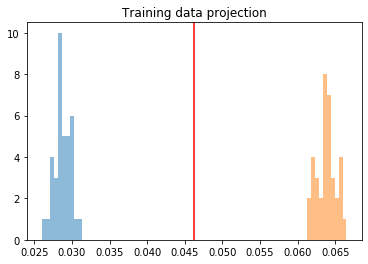

In [145]:
plt.title('Training data projection')
_ = plt.hist(g1_train,label='class 0',alpha=0.5)
_ = plt.hist(g2_train,label='class 1',alpha=0.5)
_ = plt.axvline(c, color='red')

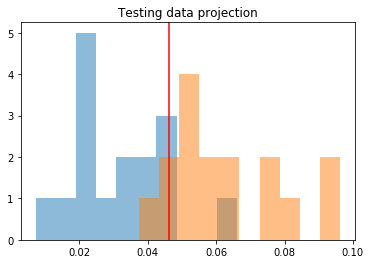

In [146]:
plt.title('Testing data projection')
_ = plt.hist(g1_test,label='class 0',alpha=0.5)
_ = plt.hist(g2_test,label='class 1',alpha=0.5)
_ = plt.axvline(c, color='red')

In [153]:
falsly_classified = 0

for i in g1_train:
    if i > c:
        falsly_classified = falsly_classified +1
        
for i in g2_train:
    if i < c:
        falsly_classified = falsly_classified +1
        
falsly_classified / len(X)

0.0

0% of observations where missclassified in the training set.

In [154]:
falsly_classified = 0

for i in g1_test:
    if i > c:
        falsly_classified = falsly_classified +1
        
for i in g2_test:
    if i < c:
        falsly_classified = falsly_classified +1
        
falsly_classified / len(X_test)

0.125

12.5% of observations where missclassified in the testset.

## Task 3: Logistic Regression

Next, we will consider classification using Logistic Regression. 

For this task, we will use a different dataset:  
It consists of activations from a convolutional neural network (ResNet18) for images of cats and dogs.
The dataset contains 2,000 samples (i.e. CNN activations) and 256 features (i.e. the CNN activations have 256 dimensions). A target value of 0 indicates a cat, 1 a dog.

Below, you find all imports that are necessary.


In [155]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle

X_all, t_all = pickle.load(open('data/cnn_features.pickle', 'rb'))

**Task 3.0: Normalize the data**

Make sure the data has has zero mean and variance 1 per feature.

In [156]:
# prepare data
# We split the data and then normalize the training data and use its mean and variance to normalize the test data
# We can't normalize over the full dataset as otherwise we would include information about the testset in 
# normalizing the training data

X, X_test, t, t_test = split_data(X_all, t_all, seed=1)
X, m, s = preprocess(X)
X_test = (X_test-m)/s

**Task 3.1: Iterative Reweighted Least Squares**

1. Implement the IRLS algorithm and output at each iteration the current training accuracy. Remember the weight are updated according to:
$$ w' = w - ( \Phi^T R \Phi ) ^ {-1} \Phi^T (y - t)$$
Where $y$ is the prediction, $t$ the ground truth target, $R$ the weighting matrix and $\Phi$ the design matrix.  
Hints:  
(a) There is a bias term in logistic regression  
(b) Use a small value for weight init to avoid numerical problems.

2. Apply the IRLS algorithm on data and compute the test accuracy.
3. Compare the results of your implementation to the sklearn implementation of `LogisticRegression(penalty='none')`. Do you get the same result?

In [190]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a)) 

In [213]:
def IRLS(X,t):
    
    #adding an intercept/bias
    X = np.column_stack((np.array([1] * len(X)), X))
    
    w = np.array([0.01] * X.shape[1])
    
    print('starting optimization')
    
    Acc_new = 0.01
    Acc_old = 0.0
    it = 0
    
    while (0.001 < Acc_new - Acc_old ) and (it < 25):
        y = sigmoid(w @ X.T)
        R = np.diag(y * (1-y))
        
        w = w - np.linalg.inv(X.T @ R @ X) @ X.T @ (y - t)
        
        for i in range(len(y)):
            if y[i] < 0.5:
                y[i] = 0
            else:
                y[i] = 1
        
        # Accuracy
        Acc_old = Acc_new #copy is not usable for float objects
        Acc_new = len(y[y == t]) / len(y)
        
        
        print('the accuracy for iteration', it, 'is', Acc_new)
        
        it += 1
    
    return w, Acc_new

#### Apply the IRLS algorithm on data and compute the test accuracy.

In [216]:
model_training = IRLS(X,t)

starting optimization
the accuracy for iteration 0 is 0.625
the accuracy for iteration 1 is 0.96
the accuracy for iteration 2 is 0.9685714285714285
the accuracy for iteration 3 is 0.9742857142857143
the accuracy for iteration 4 is 0.9835714285714285
the accuracy for iteration 5 is 0.9907142857142858
the accuracy for iteration 6 is 1.0
the accuracy for iteration 7 is 1.0


In [229]:
#predict with test data results
w = model_training[0]
X_test_intercept = np.column_stack((np.array([1] * len(X_test)), X_test))

pred_own = sigmoid(w @ X_test_intercept.T)

pred_own = np.round(pred_own,0)

In [230]:
#Prediction accuracy
len(pred_own[pred_own == t_test]) / len(pred_own)

0.8383333333333334

Our prediction accuracy is about 83.8%.

#### Compare the results of your implementation to the sklearn implementation of LogisticRegression(penalty='none'). Do you get the same result?

In [222]:
logisticRegr = LogisticRegression(penalty='none')

In [223]:
logisticRegr.fit(X,t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
pred_sk = logisticRegr.predict(X_test)

In [239]:
#Prediction accuracy
Acc_sk = len(pred_sk[pred_sk == t_test]) / len(pred_sk)
Acc_sk

0.8616666666666667

The sklearn prediction accuracy is about 86.2%.

In [233]:
w_own = model_training[0]

coef = logisticRegr.coef_
intercept = logisticRegr.intercept_
w_sk = np.append(intercept, coef)

In [234]:
(w_own - w_sk) < 0.1

array([False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True,

In [235]:
sum(pred_own == pred_sk)/len(pred_own)

0.9333333333333333

Many weights are different from the ones our algorithm calculated. Reason might be different initial guess and therefore convergence to different extreme points.
However, the two models comply in more than 93% of the cases.

**Task 3.2: Logistic Regression with Regularization**

1. Set sklearn's penalty parameter to `l1` and `l2`. Use the range `np.linspace(0.02, 1, 25)` for the parameter `C`, which controls the strength of regularization. Where is the regularization strongest, for small or big `C`?   
Hint: For `l1` regularization you can use the `saga` solver.
2. Plot strength of regularization over accuracy. Does regularization improve the scores?
3. Visualize the coefficients (or just a subset of all coefficient for a better overview) of the regularized settings and the unregularized setting. What do you observe?
3. Compare the coefficients to the LDA weights.

In [237]:
regular = np.linspace(0.02, 1, 25)

In [241]:
Acc_l1_list = list()
Acc_l2_list = list()

for par in regular:
    
    logisticRegr_l1 = LogisticRegression(penalty='l1', C=par, solver='saga', max_iter=1000)
    logisticRegr_l2 = LogisticRegression(penalty='l2', C=par, max_iter=1000)
    
    logisticRegr_l1.fit(X,t)
    logisticRegr_l2.fit(X,t)
    
    pred_l1 = logisticRegr_l1.predict(X_test)
    pred_l2 = logisticRegr_l2.predict(X_test)
    
    
    Acc_l1 = len(pred_l1[pred_l1 == t_test]) / len(t_test)

    Acc_l2 = len(pred_l2[pred_l2 == t_test]) / len(t_test)


    Acc_l1_list.append(Acc_l1)
    Acc_l2_list.append(Acc_l2)
    

#### Plot strength of regularization over accuracy. Does regularization improve the scores?

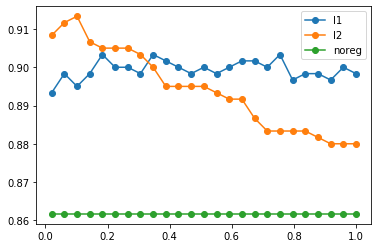

In [242]:
regplot = [None, None, None]
l1_plot, = plt.plot(np.linspace(0.02, 1, 25), Acc_l1_list, '-o')
l1_plot.set_label('l1')
l2_plot, = plt.plot(np.linspace(0.02, 1, 25), Acc_l2_list, '-o')
l2_plot.set_label('l2')
noreg_plot, = plt.plot(np.linspace(0.02, 1, 25), [Acc_sk]*25, '-o')
noreg_plot.set_label('noreg')
plt.legend()
plt.show()

In [265]:
Acc_max_l1 = max(Acc_l1_list)
Opt_c_l1 = regular[Acc_l1_list.index(Acc_max_l1)]

Acc_max_l2 = max(Acc_l2_list)
Opt_c_l2 = regular[Acc_l2_list.index(Acc_max_l2)]

print('The highest Accuracy for l1 regularization is',
      Acc_max_l1, 'at a c value of', Opt_c_l1)

print('The highest Accuracy for l2 regularization is',
      Acc_max_l2, 'at a c value of', Opt_c_l2)

The highest Accuracy for l1 regularization is 0.9033333333333333 at a c value of 0.18333333333333332
The highest Accuracy for l2 regularization is 0.9133333333333333 at a c value of 0.10166666666666667


Accuaracy is improved by regularization. Regularization is stronger for small c. Next we plot the weights for different regularization parameters c to illustrate this.

In [243]:
# set parameters
c = np.linspace(0.02, 1, 25)
n_coef = X.shape[1]

In [248]:
# get all weights for different c for L1

w_l1 = np.zeros((len(c), n_coef))

l1_model = LogisticRegression(penalty='l1', max_iter=1000, solver="saga")
for i in range(len(c)):
    l1_model.C = c[i]
    w_l1[i,] = l1_model.fit(X, t).coef_

In [249]:
# get all weights for different c for L2

w_l2 = np.zeros((len(c), n_coef))

l2_model = LogisticRegression(penalty='l2', C = c[i], max_iter=500)
for i in range(len(c)):
    l2_model.C = c[i]
    w_l2[i,] = l2_model.fit(X, t).coef_

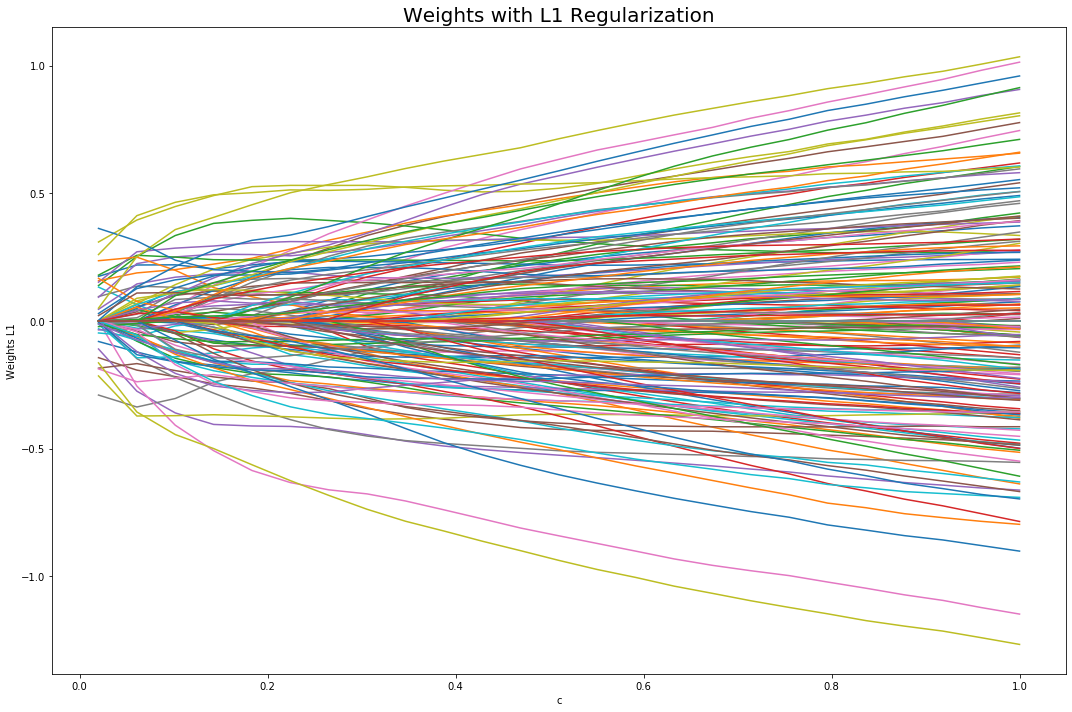

In [250]:
fig, axes = plt.subplots(1,1, figsize = (15,10))


for i in range(n_coef):
        axes.plot(c, w_l1[:,i])

axes.set_title("Weights with L1 Regularization", fontsize = 20)
axes.set_xlabel("c")
axes.set_ylabel("Weights L1")       
fig.tight_layout()

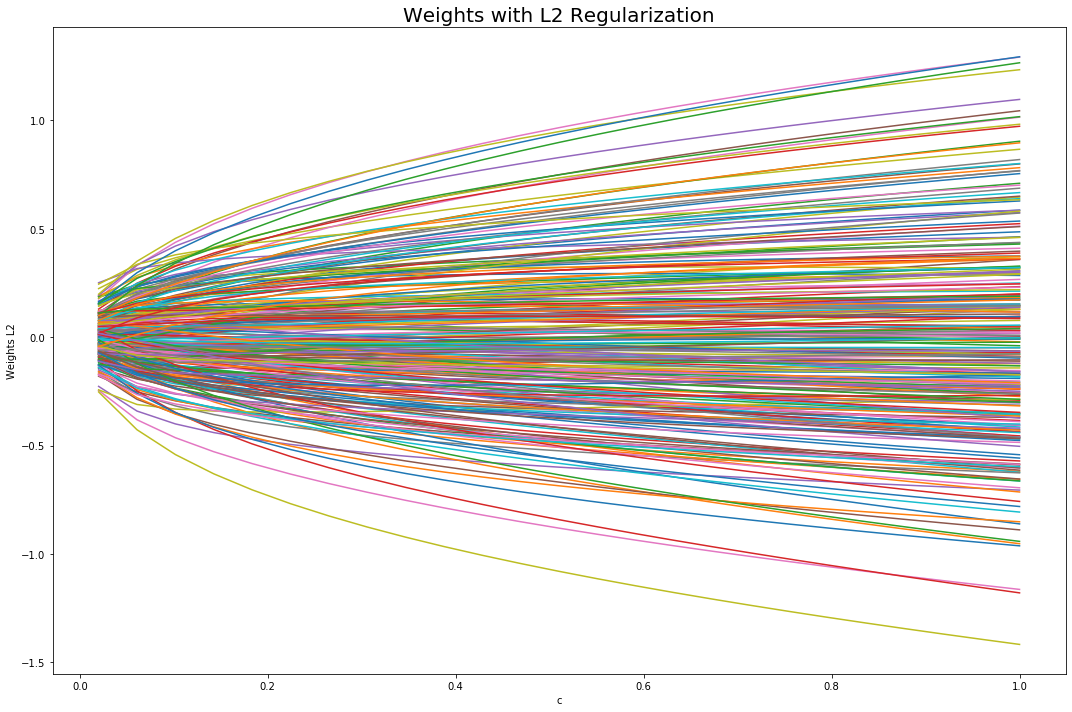

In [251]:
fig, axes = plt.subplots(1,1, figsize = (15,10))

for i in range(n_coef):
        axes.plot(c, w_l2[:,i])

axes.set_title("Weights with L2 Regularization", fontsize = 20)
axes.set_xlabel("c")
axes.set_ylabel("Weights L2")       
fig.tight_layout()

#### 3. Visualize the coefficients (or just a subset of all coefficient for a better overview) of the regularized settings and the unregularized setting. What do you observe?

In [272]:
logisticRegr = LogisticRegression(penalty='none')
logisticRegr_l1 = LogisticRegression(penalty='l1', C=Opt_c_l1, solver='saga', max_iter=1000)
logisticRegr_l2 = LogisticRegression(penalty='l2', C=Opt_c_l2, max_iter=1000)

In [273]:
logisticRegr.fit(X,t)
logisticRegr_l1.fit(X,t)
logisticRegr_l2.fit(X,t)

LogisticRegression(C=0.10166666666666667, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
w_sklearn = np.column_stack((logisticRegr.intercept_,logisticRegr.coef_))
w_sklearn_l1 = np.column_stack((logisticRegr_l1.intercept_,logisticRegr_l1.coef_))
w_sklearn_l2 = np.column_stack((logisticRegr_l2.intercept_,logisticRegr_l2.coef_))

In [ ]:
            axes[i][j].set_xlabel('protein')
            axes[i][j].set_ylabel('signals in the nuclear fraction of cortex.')            
        
        b=b+1
        
axes[0][0].legend(list(["0","1","2","3","4","5","6","7","8","9"]), title="observation")   
fig.suptitle('Showing the signals of 64 proteins in the nuclear fraction of the cortex for the first 10 observations', fontsize=16)

plt.show()   

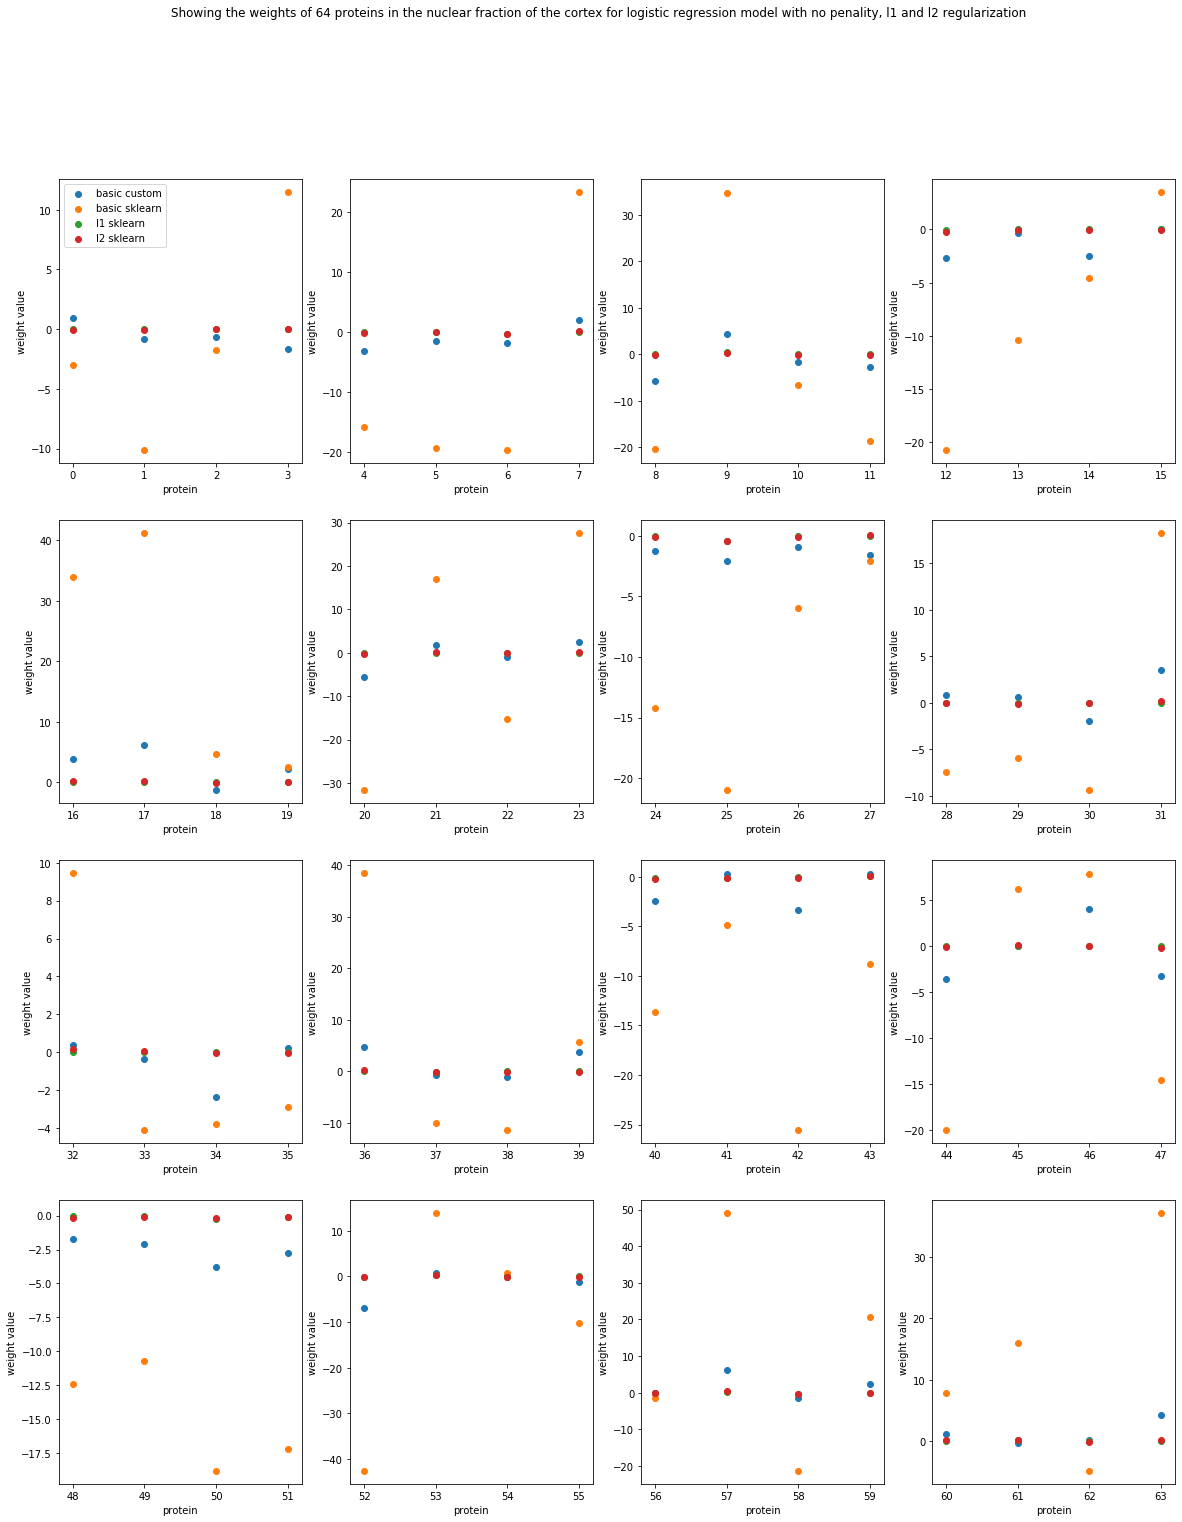

In [278]:
fig, axes = plt.subplots(4,4, figsize = (20,24))

b=0    


for i in range(4):
    for j in range(4):
        weights = list(range(b*4,b*4+4))
        
        axes[i][j].scatter(weights, w[weights])
        axes[i][j].scatter(weights, w_sklearn[0][weights])
        axes[i][j].scatter(weights, w_sklearn_l1[0][weights])
        axes[i][j].scatter(weights, w_sklearn_l2[0][weights])
        axes[i][j].set_xticks(weights)
        axes[i][j].set_xlabel('protein')
        axes[i][j].set_ylabel('weight value')            
        
        
        b=b+1
        
axes[0][0].legend(list(["basic custom","basic sklearn","l1 sklearn","l2 sklearn"]))          
fig.suptitle('Showing the weights of 64 proteins in the nuclear fraction of the cortex for logistic regression model with no penality, l1 and l2 regularization')

plt.show()       

- There are significant differences between the model without regularization and those with regularization as the regularization is quite stron with small c values.
- l1 sklearn and l2 sklearn are very similar. The are closer to zero than in the non penalty model due to regularization.

# 4. Compare the coefficients to the LDA weights.

In [627]:
m0, m1, mdiff, w_lda = compute_lda_weights(X, t)

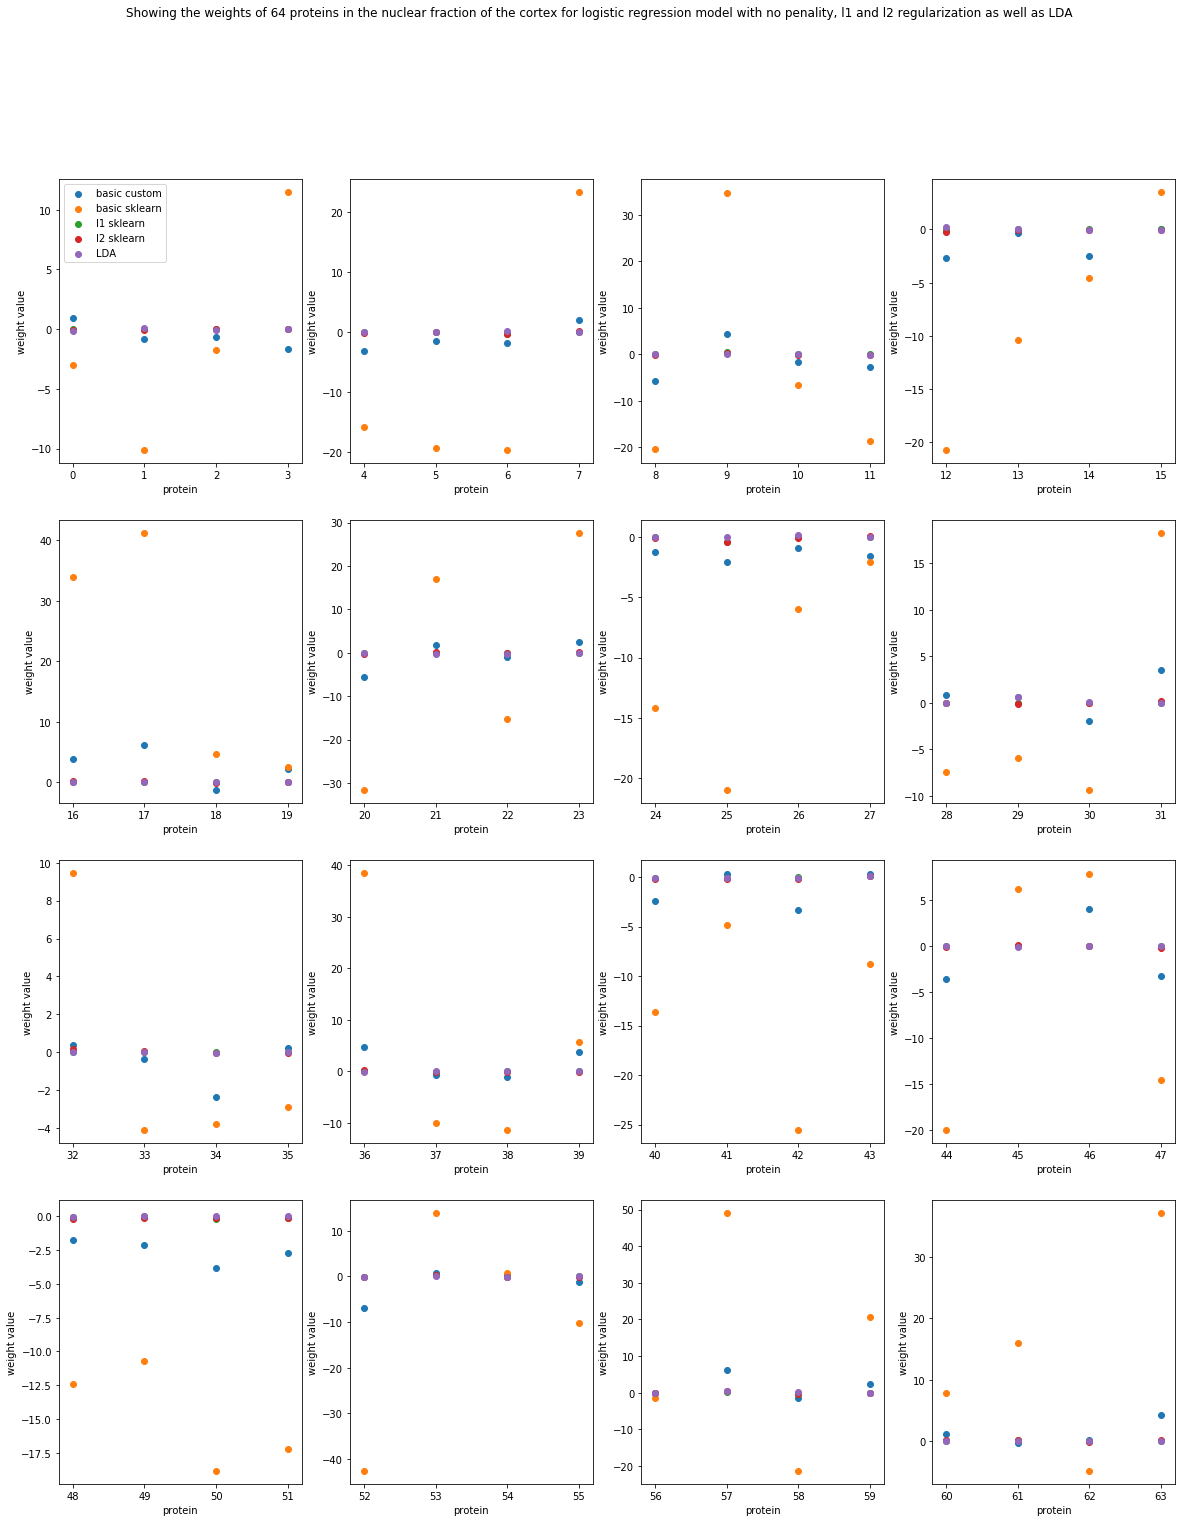

In [280]:
fig, axes = plt.subplots(4,4, figsize = (20,24))

b=0    


for i in range(4):
    for j in range(4):
        weights = list(range(b*4,b*4+4))
        
        axes[i][j].scatter(weights, w[weights])
        axes[i][j].scatter(weights, w_sklearn[0][weights])
        axes[i][j].scatter(weights, w_sklearn_l1[0][weights])
        axes[i][j].scatter(weights, w_sklearn_l2[0][weights])
        axes[i][j].scatter(weights, w_lda[weights])
        axes[i][j].set_xticks(weights)
        axes[i][j].set_xlabel('protein')
        axes[i][j].set_ylabel('weight value')            
        
        
        b=b+1
        
axes[0][0].legend(list(["basic custom","basic sklearn","l1 sklearn","l2 sklearn","LDA"]))          
fig.suptitle('Showing the weights of 64 proteins in the nuclear fraction of the cortex for logistic regression model with no penality, l1 and l2 regularization as well as LDA')

plt.show()       

- LDA are very close to l2 and l1 sklearn. this is because we normalized the LDA weights and thus there values are close to zero, as are the l1 and l2 weights as they are strongly regularized.
- Weights of logistic regression and LDA are not comparable. Different approaches since the weights of logistic regression are used in a sigmoid function to compute probabilites for the class (t=c1) whereas LDA only projects the features on the real number line. Even with an appropriate threshold to divide the two classes, our predictions y would be of different scale.